# ISM / Confocal image processing for fluorescence lifetime reconstruction

### Create an instance of FlimData class. 4D dataset (Nx, Ny, time bin, detector channel) of both acquired sample and IRF are loaded  

In [1]:
import h5py
import brighteyes_flim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(brighteyes_flim.__file__)
flim_ref=brighteyes_flim.FlimData(data_path = r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5",                                   
                                  data_path_irf = r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-08-30.h5")

c:\users\fdelbufalo\pycharmprojects\brighteyes-flim\src\brighteyes_flim\__init__.py
(25,) (120, 25)
(120, 25)
(25,) (120, 25)
(120, 25)
phasor global [0.80900344+0.33047155j 0.82117014+0.32540531j 0.81753442+0.34308557j
 0.82738479+0.30589401j 0.81206583+0.28976382j 0.84268827+0.26475148j
 0.83876139+0.31874846j 0.84532327+0.30775997j 0.83518505+0.3020658j
 0.5695767 +0.20804159j 0.82723953+0.31727853j 0.84468436+0.30228793j
 0.85318181+0.29686993j 0.84350275+0.29087898j 0.81090762+0.30792259j
 0.83511306+0.28242628j 0.81472089+0.34759367j 0.83050264+0.31800716j
 0.82360277+0.30630188j 0.81195625+0.30479377j 0.86932519+0.07367437j
 0.81951388+0.30775027j 0.80988784+0.30627922j 0.80666162+0.31580707j
 0.77791166+0.33626605j]
phasor global irf [0.85616215+0.44359637j 0.86636624+0.43941875j 0.85302644+0.45669867j
 0.86837763+0.41761073j 0.82106732+0.37943993j 0.89322733+0.37672444j
 0.8839    +0.43381017j 0.88980441+0.42105522j 0.87921243+0.41832831j
 0.55770971+0.27337359j 0.866843  +0.4

###  Save in a .h5 file the phasors computed from the pixels'decay histograms performing a FFT on the histograms' time bins and extracting the first harmonic

In [3]:
with h5py.File(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5","r") as f:
    
        print(f.keys())
        data_input = f["data"]  # image with the decay histograms in each pixel realigned 
                                     # with respect to the signal which triggers the beginning of the excitation
        data = data_input[0, 0,...]
      
        print(data.shape)

        brighteyes_flim.phasor_h5(data_path = r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5", data_input = data) 

<KeysViewHDF5 ['configurationFPGA', 'configurationGUI', 'configurationGUI_beforeStart', 'configurationSpadFCSmanager', 'data', 'data_channels_extra']>
(2000, 2000, 120, 25)


c:\users\fdelbufalo\pycharmprojects\brighteyes-flim\src\brighteyes_flim\flism.py:437: RuntimeWarning: invalid value encountered in divide
  out = transform / flux


### Pixels' phasors are displayed in the phasor plot. Fluorescene decay histograms are not aligned with the first time bin and have not been corrected for the IRF . 


<KeysViewHDF5 ['h5_dataset_phasor_pix']>
(2000, 2000)


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

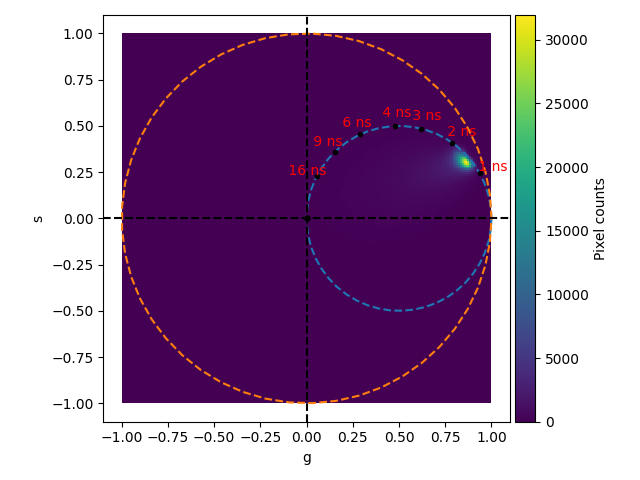

In [4]:
%matplotlib widget

hf_phasors_per_pixel = h5py.File(r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34_phasors_matrix.h5", "r")
print(hf_phasors_per_pixel.keys())

phasors_pix = hf_phasors_per_pixel["h5_dataset_phasor_pix"]  # data with phasors in each pixel

print(phasors_pix.shape)

brighteyes_flim.plot_phasor(phasors_pix[:], bins_2dplot=200, log_scale=False, quadrant='all')

### Extract IRF's phasor

In [8]:
import brighteyes_ism.dataio.mcs as mcs
data_path_irf = r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-08-30.h5"
data_irf = h5py.File(data_path_irf)

image_irf = data_irf["data"]
data_hist_irf = np.sum(image_irf, axis=(0, 1, 2, 3))
print(data_hist_irf.shape)

phasor_irf = brighteyes_flim.calculate_phasor(data_hist_irf)
print(phasor_irf)

(120, 25)
(25,) (120, 25)
(120, 25)
[0.85616215+0.44359637j 0.86636624+0.43941875j 0.85302644+0.45669867j
 0.86837763+0.41761073j 0.82106732+0.37943993j 0.89322733+0.37672444j
 0.8839    +0.43381017j 0.88980441+0.42105522j 0.87921243+0.41832831j
 0.55770971+0.27337359j 0.866843  +0.43378837j 0.89109694+0.41698361j
 0.89902722+0.40847889j 0.89363103+0.40418449j 0.83826262+0.415977j
 0.88389838+0.39486662j 0.85293561+0.46381093j 0.8799793 +0.43287568j
 0.87254028+0.41972447j 0.85342337+0.41115407j 0.92497425+0.16066465j
 0.85859009+0.41482545j 0.83651736+0.40858614j 0.84183646+0.42221533j
 0.81037002+0.43655982j]


In [45]:
bins_irf = np.sum(data_hist_irf, axis = -1)
print(bins_irf.shape)
phasor_i = brighteyes_flim.calculate_phasor(bins_irf)
print(phasor_i)



(120,)
(0.8856249073327052+0.41613919939060723j)


### Shift the pixels' phasors (for both data and IRF) according to the laser's phasor

In [46]:
#load the histogram of the laser trigger signal (26th channel) acquired during the sample's acquisition
import brighteyes_ism.dataio.mcs as mcs
data_path = r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-32-34.h5"
data_extra, _ = mcs.load(data_path, key="data_channels_extra")
data_laser = data_extra[:, :, :, :, :, 1]
print(data_laser.shape)
data_laser_hist = np.sum(data_laser, axis = (0,1,2,3))
phasor_laser = brighteyes_flim.calculate_phasor(data_laser_hist)
print(phasor_laser)

(1, 1, 2000, 2000, 120)
(-0.7573752944036434+0.6468463658494981j)


In [48]:
#load the histogram of the laser trigger signal (26th channel) acquired with the IRF acquisition
data_path_irf = r"C:\Users\fdelbufalo\Desktop\images\data-07-12-2023-20-08-30.h5"
data_extra_irf, _ = mcs.load(data_path_irf, key="data_channels_extra")
data_laser_irf = data_extra_irf[:, :, :, :, :, 1]
print(data_laser_irf.shape)
data_laser_hist_irf = np.sum(data_laser_irf, axis = (0,1,2,3))
phasor_laser_irf = brighteyes_flim.calculate_phasor(data_laser_hist_irf)
print(phasor_laser_irf)

(1, 1, 100, 100, 120)
(-0.9202126702421962+0.3810875011052348j)


### calculate shift term to be multiplied for the pixels' phasors matrix to realign the phasors in the sample's pixels

In [49]:
#  histograms
corr = brighteyes_flim.correction_phasor(data_laser_hist, data_laser_hist_irf)
print(corr)

(0.9510375486319841+0.30907536474469527j)


In [50]:
phasor_corrected = phasors_pix * corr / phasor_i

### Display the phasor plot of the data realigned 

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='g', ylabel='s'>)

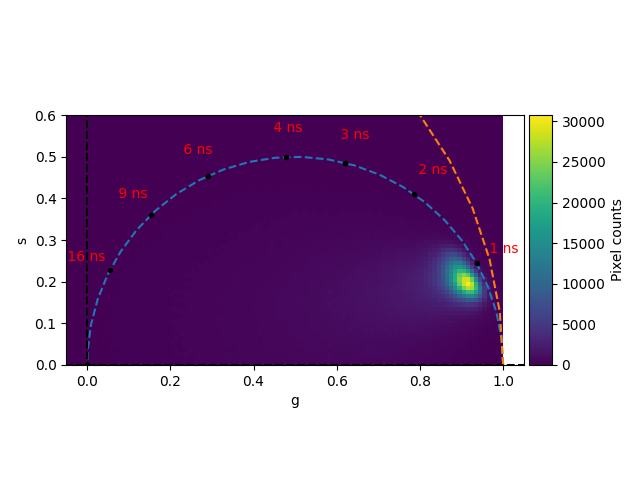

In [54]:
brighteyes_flim.plot_phasor(phasor_corrected, bins_2dplot=200, log_scale=False, quadrant='first')

# Lifetime analysis

#### Calculate the fluorescence lifetime from the phasor for each pixel with the formula below (f = dfd frequency or laser rep rate frequency):
#### τ<sub>φ</sub> = (1/(2*π*f)) * tan(φ)
#### φ = arctan(s/g)
#### g = Re{phasor_corrected}
#### s = Im{phasor_corrected}


In [57]:
tau_phi = brighteyes_flim.calculate_tau_phi(np.real(phasor_corrected), np.imag(phasor_corrected))
print(tau_phi.shape)



(2000, 2000)


#### Calculate the fluorescence lifetime from the phasor for each pixel with the formula below (f = dfd frequency or laser rep rate frequency):
#### τ<sub>m</sub> = (1/2*π*f) * √(1/m<sup>2</sup> - 1)
#### m = √g<sup>2</sup> + s<sup>2</sup>
#### g = Re{phasor_corrected}
#### s = Im{phasor_corrected}



In [58]:
tau_m = brighteyes_flim.calculate_tau_m(np.real(phasor_corrected), np.imag(phasor_corrected))
print(tau_m.shape)


(2000, 2000)


### Visualize histograms of tau distribution in the pixels and intensity map of the image 

C:\Users\fdelbufalo\AppData\Local\Temp\ipykernel_19240\2257330416.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


(array([   2536.,    2530.,    2915.,    2965.,    3350.,    3498.,
           3983.,    4276.,    4655.,    5168.,    6031.,    6432.,
           7419.,    8200.,    9613.,   11048.,   12997.,   15490.,
          18690.,   22569.,   27834.,   35736.,   46392.,   61999.,
          85676.,  123583.,  193389.,  495752., 1168918.,  634203.,
         233816.,  128606.,   89984.,   66359.,   50715.,   39615.,
          32177.,   26010.,   21880.,   18168.,   15512.,   13331.,
          11633.,   10079.,    8785.,    7655.,    7129.,    6365.,
           5740.,    5177.]),
 array([-6.  , -5.76, -5.52, -5.28, -5.04, -4.8 , -4.56, -4.32, -4.08,
        -3.84, -3.6 , -3.36, -3.12, -2.88, -2.64, -2.4 , -2.16, -1.92,
        -1.68, -1.44, -1.2 , -0.96, -0.72, -0.48, -0.24,  0.  ,  0.24,
         0.48,  0.72,  0.96,  1.2 ,  1.44,  1.68,  1.92,  2.16,  2.4 ,
         2.64,  2.88,  3.12,  3.36,  3.6 ,  3.84,  4.08,  4.32,  4.56,
         4.8 ,  5.04,  5.28,  5.52,  5.76,  6.  ]),
 <BarContainer obje

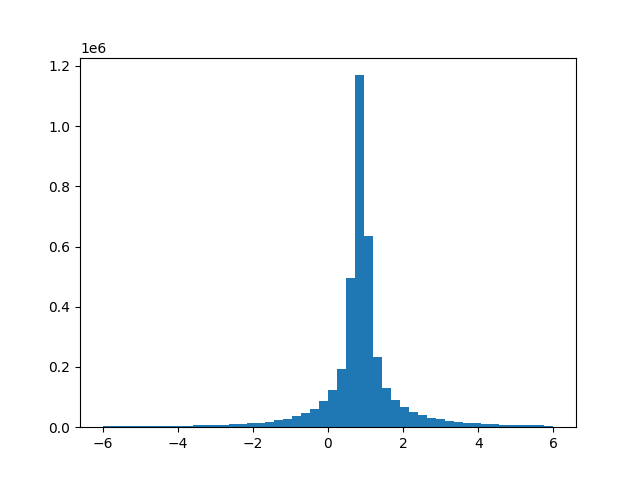

In [59]:
tau_data = 1e9*tau_phi.flatten()

plt.figure()
plt.hist(tau_data, range = (-6, 6), bins = 50)

(array([  1918.,   6004.,  14550.,  58842., 234977., 483202., 484940.,
        312437., 196190., 151674., 135061., 125926., 116948., 109843.,
        102854.,  95965.,  89577.,  82306.,  77186.,  70868.,  65311.,
         60286.,  55329.,  51386.,  47282.,  43935.,  40457.,  37005.,
         34361.,  31820.,  29456.,  27419.,  25469.,  23516.,  22612.,
         20569.,  19328.,  18013.,  16960.,  15857.,  15645.,  13920.,
         13028.,  12314.,  11744.,  10900.,  10197.,   9701.,   9301.,
          8379.]),
 array([ 0.  ,  0.26,  0.52,  0.78,  1.04,  1.3 ,  1.56,  1.82,  2.08,
         2.34,  2.6 ,  2.86,  3.12,  3.38,  3.64,  3.9 ,  4.16,  4.42,
         4.68,  4.94,  5.2 ,  5.46,  5.72,  5.98,  6.24,  6.5 ,  6.76,
         7.02,  7.28,  7.54,  7.8 ,  8.06,  8.32,  8.58,  8.84,  9.1 ,
         9.36,  9.62,  9.88, 10.14, 10.4 , 10.66, 10.92, 11.18, 11.44,
        11.7 , 11.96, 12.22, 12.48, 12.74, 13.  ]),
 <BarContainer object of 50 artists>)

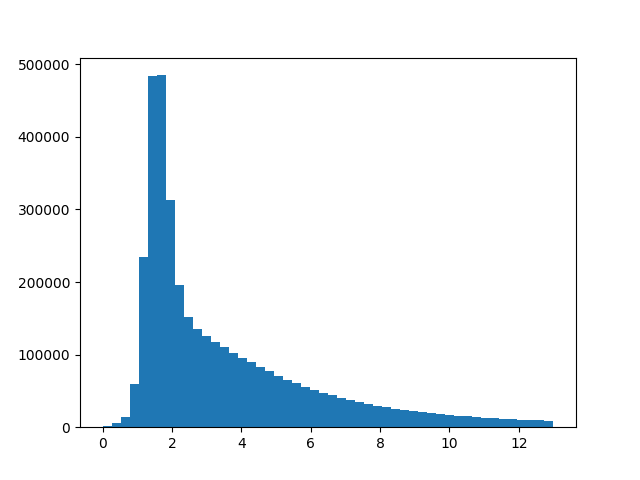

In [62]:
tau_m_data = 1e9*tau_m.flatten()

plt.figure()
plt.hist(tau_m_data, range = (0, 13), bins = 50)

(2000, 2000)


(array([1.21773e+05, 6.74347e+05, 6.26301e+05, 3.59246e+05, 2.16055e+05,
        1.41252e+05, 9.81700e+04, 7.40390e+04, 5.85710e+04, 4.78840e+04,
        4.06180e+04, 3.52290e+04, 3.12610e+04, 2.86360e+04, 2.61860e+04,
        2.49240e+04, 2.40810e+04, 2.38200e+04, 2.37420e+04, 2.41570e+04,
        2.49710e+04, 2.65260e+04, 2.79160e+04, 3.03500e+04, 3.35410e+04,
        3.60640e+04, 3.85910e+04, 4.18770e+04, 4.47290e+04, 4.70210e+04,
        4.94680e+04, 5.08510e+04, 5.18810e+04, 5.18930e+04, 5.16580e+04,
        5.03850e+04, 4.93300e+04, 4.81830e+04, 4.59820e+04, 4.40060e+04,
        4.27060e+04, 4.04560e+04, 3.78230e+04, 3.52560e+04, 3.31150e+04,
        3.01370e+04, 2.75110e+04, 2.49340e+04, 2.22700e+04, 2.00100e+04,
        1.80250e+04, 1.58220e+04, 1.43600e+04, 1.24710e+04, 1.10070e+04,
        9.78100e+03, 8.53200e+03, 7.53600e+03, 6.59800e+03, 5.57000e+03,
        4.97900e+03, 4.32200e+03, 3.64600e+03, 3.20800e+03, 2.66400e+03,
        2.30500e+03, 1.87500e+03, 1.54400e+03, 1.28

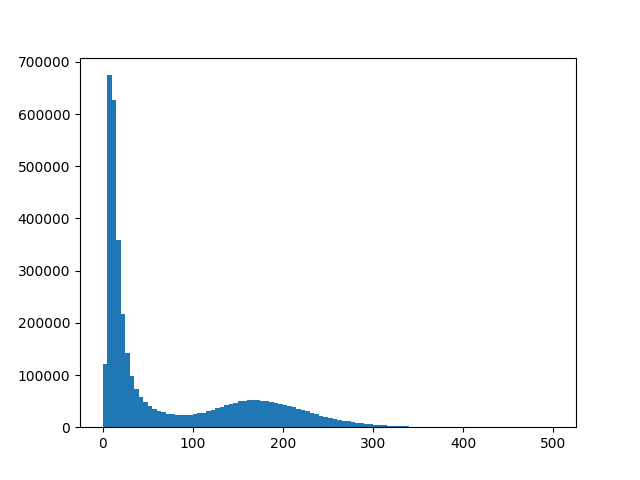

In [33]:
data_histograms = np.sum(data, axis = (2, 3))
print(data_histograms.shape)
    
# Plot the histogram of the photon counts in each pixel to see the distribution (e.g. check the level of noise) 
plt.figure()
plt.hist(data_histograms.flatten(), bins = 100, range = (0, 500))

### Display the FLIM image representing the lifetime and intensity with a 2D colormap

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: >,
        <Axes: xlabel='Counts/324 $\\mathregular{\\mu s}$', ylabel='Lifetime (ns)'>],
       dtype=object))

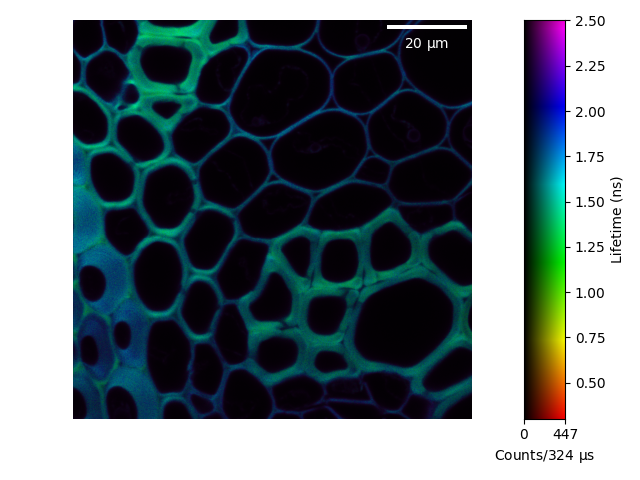

In [43]:
import brighteyes_ism.analysis.Graph_lib as gr

gr.show_flim(data_histograms, tau_m*1e9, pxsize = 0.05, pxdwelltime = 324, lifetime_bounds = (0.3, 2.5))  